Import  libraries

In [48]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
df = pd.read_csv('Housing.csv')

In [49]:

print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())


print("\nMissing Values per column:")
print(df.isnull().sum())

categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Features:")
for col in categorical_cols:
    print(f"\nFrequency distribution of {col}:")
    print(df[col].value_counts())


print("\nTarget Variable Analysis (Price):")
print(df['price'].describe())

Data Shape: (545, 13)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Descriptive Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
print("Simple Linear Regression:")
print(f"  MAE: {mae_simple}")
print(f"  MSE: {mse_simple}")
print(f"  R-squared: {r2_simple}")


Simple Linear Regression:
  MAE: 1474748.1337969352
  MSE: 3675286604768.185
  R-squared: 0.27287851871974644


In [52]:
highest_price = df['price'].max()
lowest_price = df['price'].min()

print("Highest price:", highest_price)
print("Lowest price:", lowest_price)

Highest price: 13300000
Lowest price: 1750000


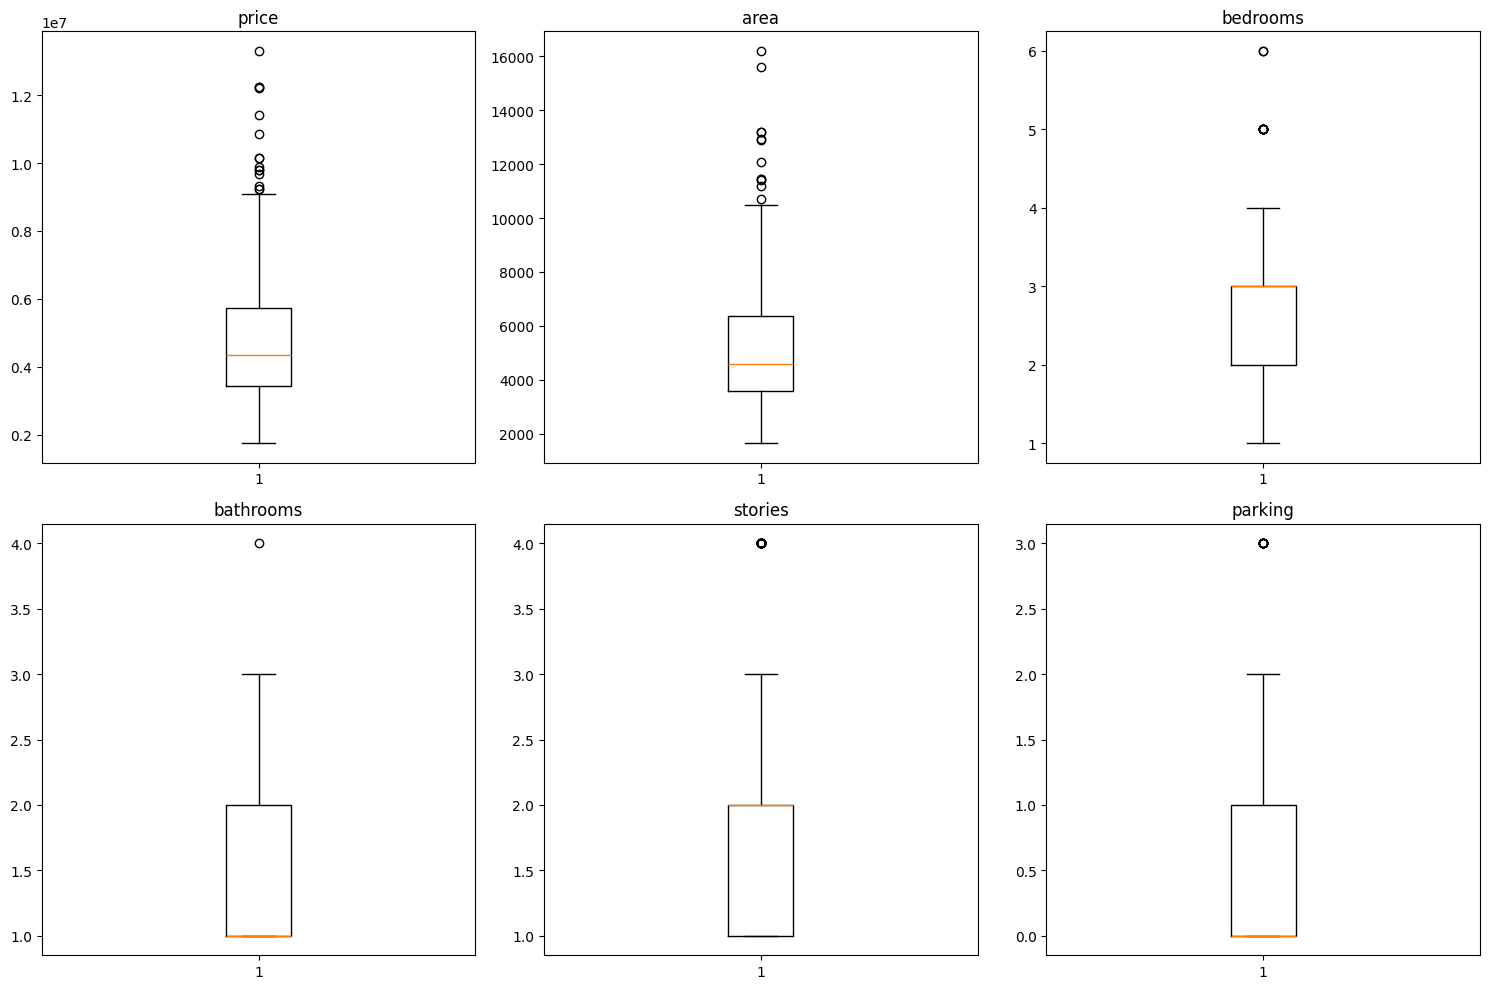

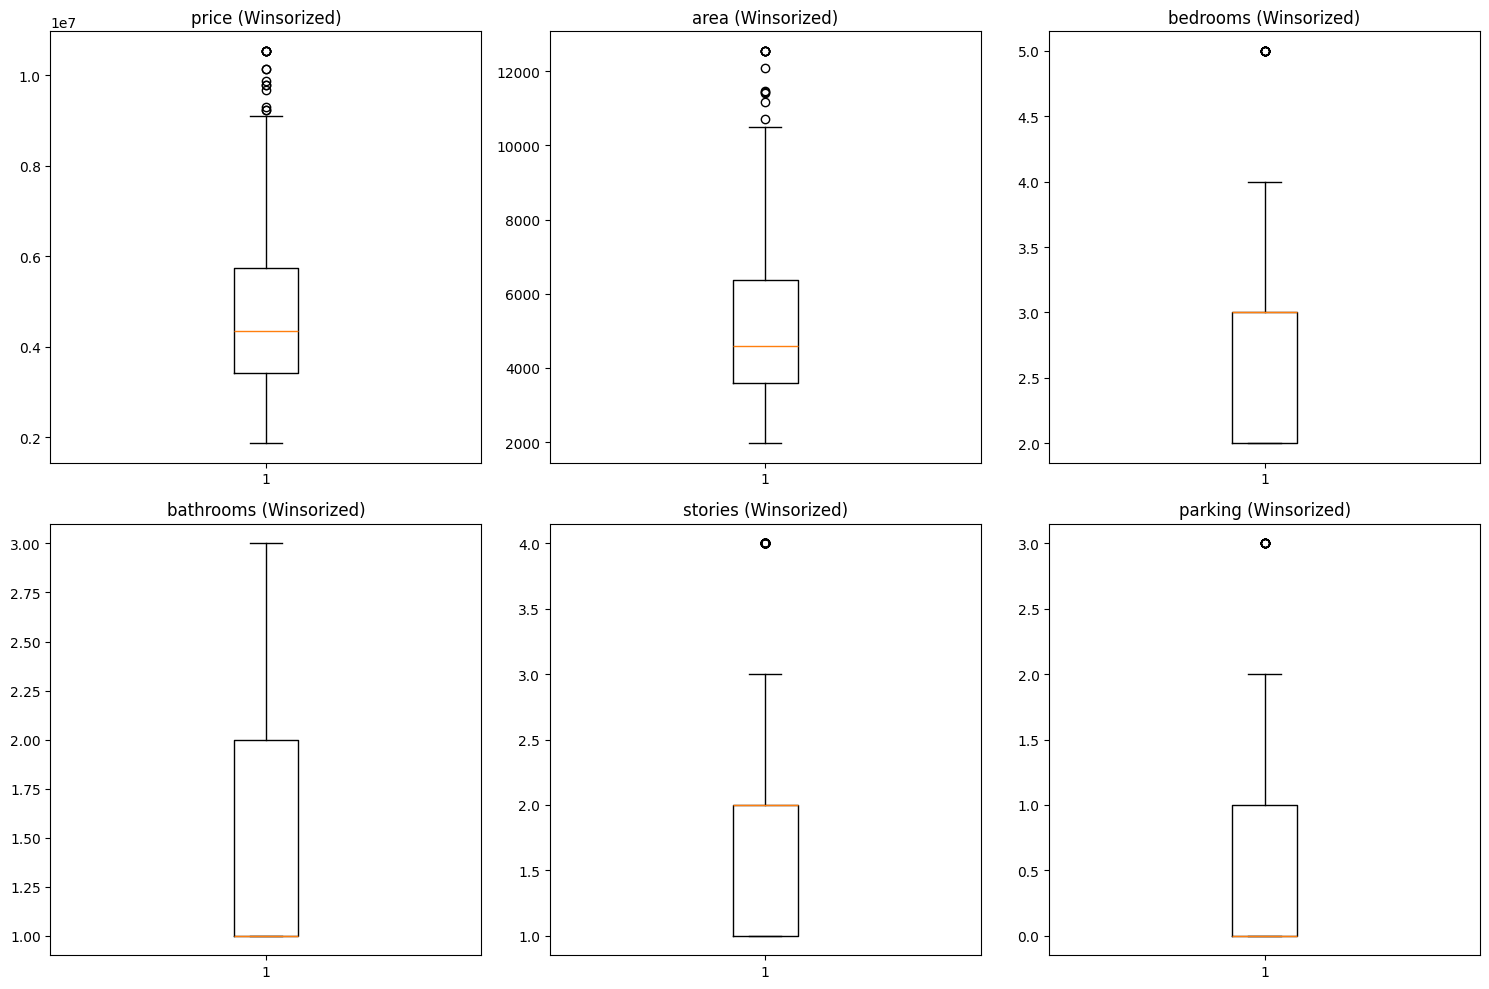

In [53]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


for col in numerical_cols:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(f'{col} (Winsorized)')
plt.tight_layout()
plt.show()

In [54]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

y = df['price']
X = df.drop('price', axis=1)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
simple_regressor = LinearRegression()
simple_regressor.fit(X_train[['area']], y_train)


LinearRegression()

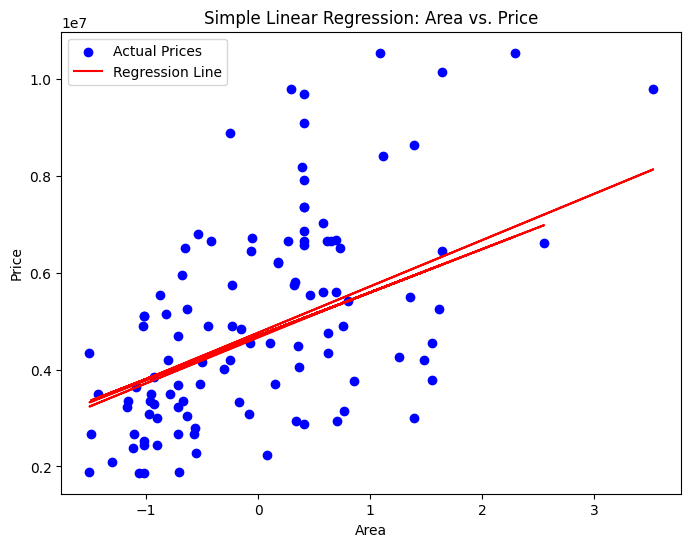

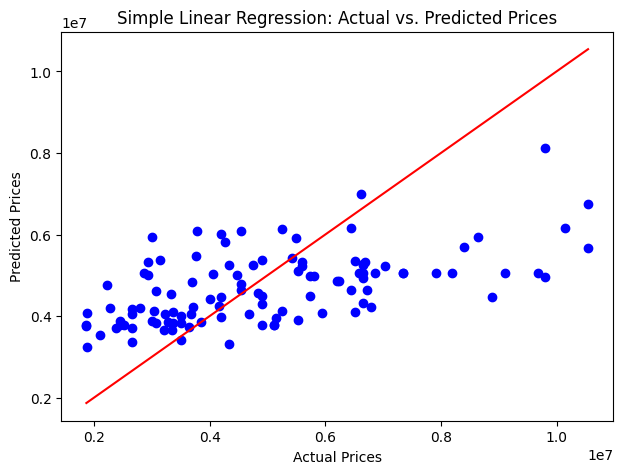

In [57]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

simple_regressor = LinearRegression()
simple_regressor.fit(X_train[['area']], y_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Prices')
plt.plot(X_test['area'], y_pred_simple, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_simple, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Simple Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


plt.tight_layout()
plt.show()


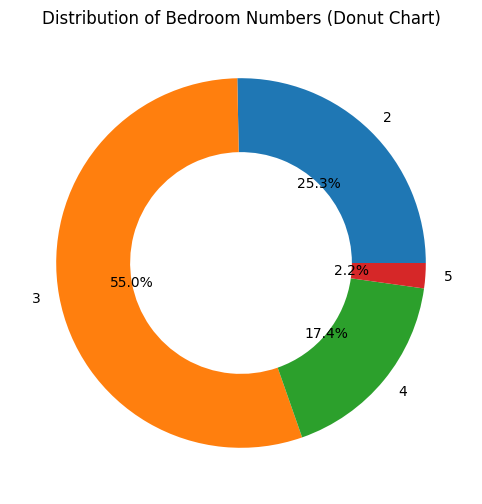

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(filtered_counts.values, labels=filtered_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title("Distribution of Bedroom Numbers (Donut Chart)")
plt.show()